In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import random
import sklearn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
trainData = pd.read_csv("train.csv")
testData = pd.read_csv("test.csv")

In [3]:
trainData = pd.concat([trainData,testData],axis=0)

In [4]:
trainData

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN


In [124]:
del trainData["Name"],testData["Name"],trainData["PassengerId"],testData["PassengerId"]

In [125]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12682 non-null  object 
 1   CryoSleep     12660 non-null  object 
 2   Cabin         12671 non-null  object 
 3   Destination   12696 non-null  object 
 4   Age           12700 non-null  float64
 5   VIP           12674 non-null  object 
 6   RoomService   12707 non-null  float64
 7   FoodCourt     12681 non-null  float64
 8   ShoppingMall  12664 non-null  float64
 9   Spa           12686 non-null  float64
 10  VRDeck        12702 non-null  float64
 11  Transported   8693 non-null   object 
dtypes: float64(6), object(6)
memory usage: 1.3+ MB


In [126]:
objectCols = np.where(trainData.dtypes == object)[0]
floatCols = np.where(trainData.dtypes == np.float64)[0]

In [127]:
for col in objectCols:
    trainData[trainData.columns[col]].fillna(trainData[trainData.columns[col]].mode()[0],inplace=True)
for col in floatCols:
    trainData[trainData.columns[col]].fillna(trainData[trainData.columns[col]].mean(),inplace=True)

In [128]:
trainData.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482
std,14.236710,640.996685,1566.618306,583.550067,1117.835494,1167.840416
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,79.000000,126.000000,47.000000,87.000000,64.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [129]:
trainData

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.000000,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.000000,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.000000,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.000000,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.000000,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,G/1496/S,TRAPPIST-1e,34.000000,False,0.0,0.0,0.0,0.0,0.0,True
4273,Earth,False,G/160/P,TRAPPIST-1e,42.000000,False,0.0,847.0,17.0,10.0,144.0,True
4274,Mars,True,D/296/P,55 Cancri e,28.771969,False,0.0,0.0,0.0,0.0,0.0,True
4275,Europa,False,D/297/P,TRAPPIST-1e,28.771969,False,0.0,2680.0,0.0,0.0,523.0,True


In [130]:
for col in trainData.columns:
    print(col," unique values shape is ",trainData[col].unique().shape[0])

HomePlanet  unique values shape is  3
CryoSleep  unique values shape is  2
Cabin  unique values shape is  9825
Destination  unique values shape is  3
Age  unique values shape is  81
VIP  unique values shape is  2
RoomService  unique values shape is  1579
FoodCourt  unique values shape is  1954
ShoppingMall  unique values shape is  1368
Spa  unique values shape is  1680
VRDeck  unique values shape is  1643
Transported  unique values shape is  2


In [131]:
"""
Cabin sütunu geliştirilecek
"""

'\nCabin sütunu geliştirilecek\n'

In [132]:
dummies = pd.get_dummies(trainData["HomePlanet"])
trainData = pd.concat([trainData,dummies],axis=1)
del trainData["HomePlanet"]

In [133]:
dummies = pd.get_dummies(trainData["Destination"])
trainData = pd.concat([trainData,dummies],axis=1)
del trainData["Destination"]

In [134]:
trainData["CryoSleep"].replace([False,True],[0,1],inplace=True)

In [135]:
trainData["VIP"].replace([False,True],[0,1],inplace=True)

In [136]:
trainData

,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,0,B/0/P,39.000000,0,0.0,0.0,0.0,0.0,0.0,False,0,1,0,0,0,1
1,0,F/0/S,24.000000,0,109.0,9.0,25.0,549.0,44.0,True,1,0,0,0,0,1
2,0,A/0/S,58.000000,1,43.0,3576.0,0.0,6715.0,49.0,False,0,1,0,0,0,1
3,0,A/0/S,33.000000,0,0.0,1283.0,371.0,3329.0,193.0,False,0,1,0,0,0,1
4,0,F/1/S,16.000000,0,303.0,70.0,151.0,565.0,2.0,True,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,G/1496/S,34.000000,0,0.0,0.0,0.0,0.0,0.0,True,1,0,0,0,0,1
4273,0,G/160/P,42.000000,0,0.0,847.0,17.0,10.0,144.0,True,1,0,0,0,0,1
4274,1,D/296/P,28.771969,0,0.0,0.0,0.0,0.0,0.0,True,0,0,1,1,0,0
4275,0,D/297/P,28.771969,0,0.0,2680.0,0.0,0.0,523.0,True,0,1,0,0,0,1


In [137]:
trainData[['Cabin String','Cabin Float',"Cabin Bool"]] = trainData['Cabin'].str.split('/',expand=True)

In [138]:
del trainData["Cabin"]

In [139]:
dummies = pd.get_dummies(trainData["Cabin Bool"])
trainData = pd.concat([trainData,dummies],axis=1)
del trainData["Cabin Bool"]

In [140]:
dummies = pd.get_dummies(trainData["Cabin String"])
trainData = pd.concat([trainData,dummies],axis=1)
del trainData["Cabin String"]

In [141]:
trainData

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Earth,...,P,S,A,B,C,D,E,F,G,T
0,0,39.000000,0,0.0,0.0,0.0,0.0,0.0,False,0,...,1,0,0,1,0,0,0,0,0,0
1,0,24.000000,0,109.0,9.0,25.0,549.0,44.0,True,1,...,0,1,0,0,0,0,0,1,0,0
2,0,58.000000,1,43.0,3576.0,0.0,6715.0,49.0,False,0,...,0,1,1,0,0,0,0,0,0,0
3,0,33.000000,0,0.0,1283.0,371.0,3329.0,193.0,False,0,...,0,1,1,0,0,0,0,0,0,0
4,0,16.000000,0,303.0,70.0,151.0,565.0,2.0,True,1,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,34.000000,0,0.0,0.0,0.0,0.0,0.0,True,1,...,0,1,0,0,0,0,0,0,1,0
4273,0,42.000000,0,0.0,847.0,17.0,10.0,144.0,True,1,...,1,0,0,0,0,0,0,0,1,0
4274,1,28.771969,0,0.0,0.0,0.0,0.0,0.0,True,0,...,1,0,0,0,0,1,0,0,0,0
4275,0,28.771969,0,0.0,2680.0,0.0,0.0,523.0,True,0,...,1,0,0,0,0,1,0,0,0,0


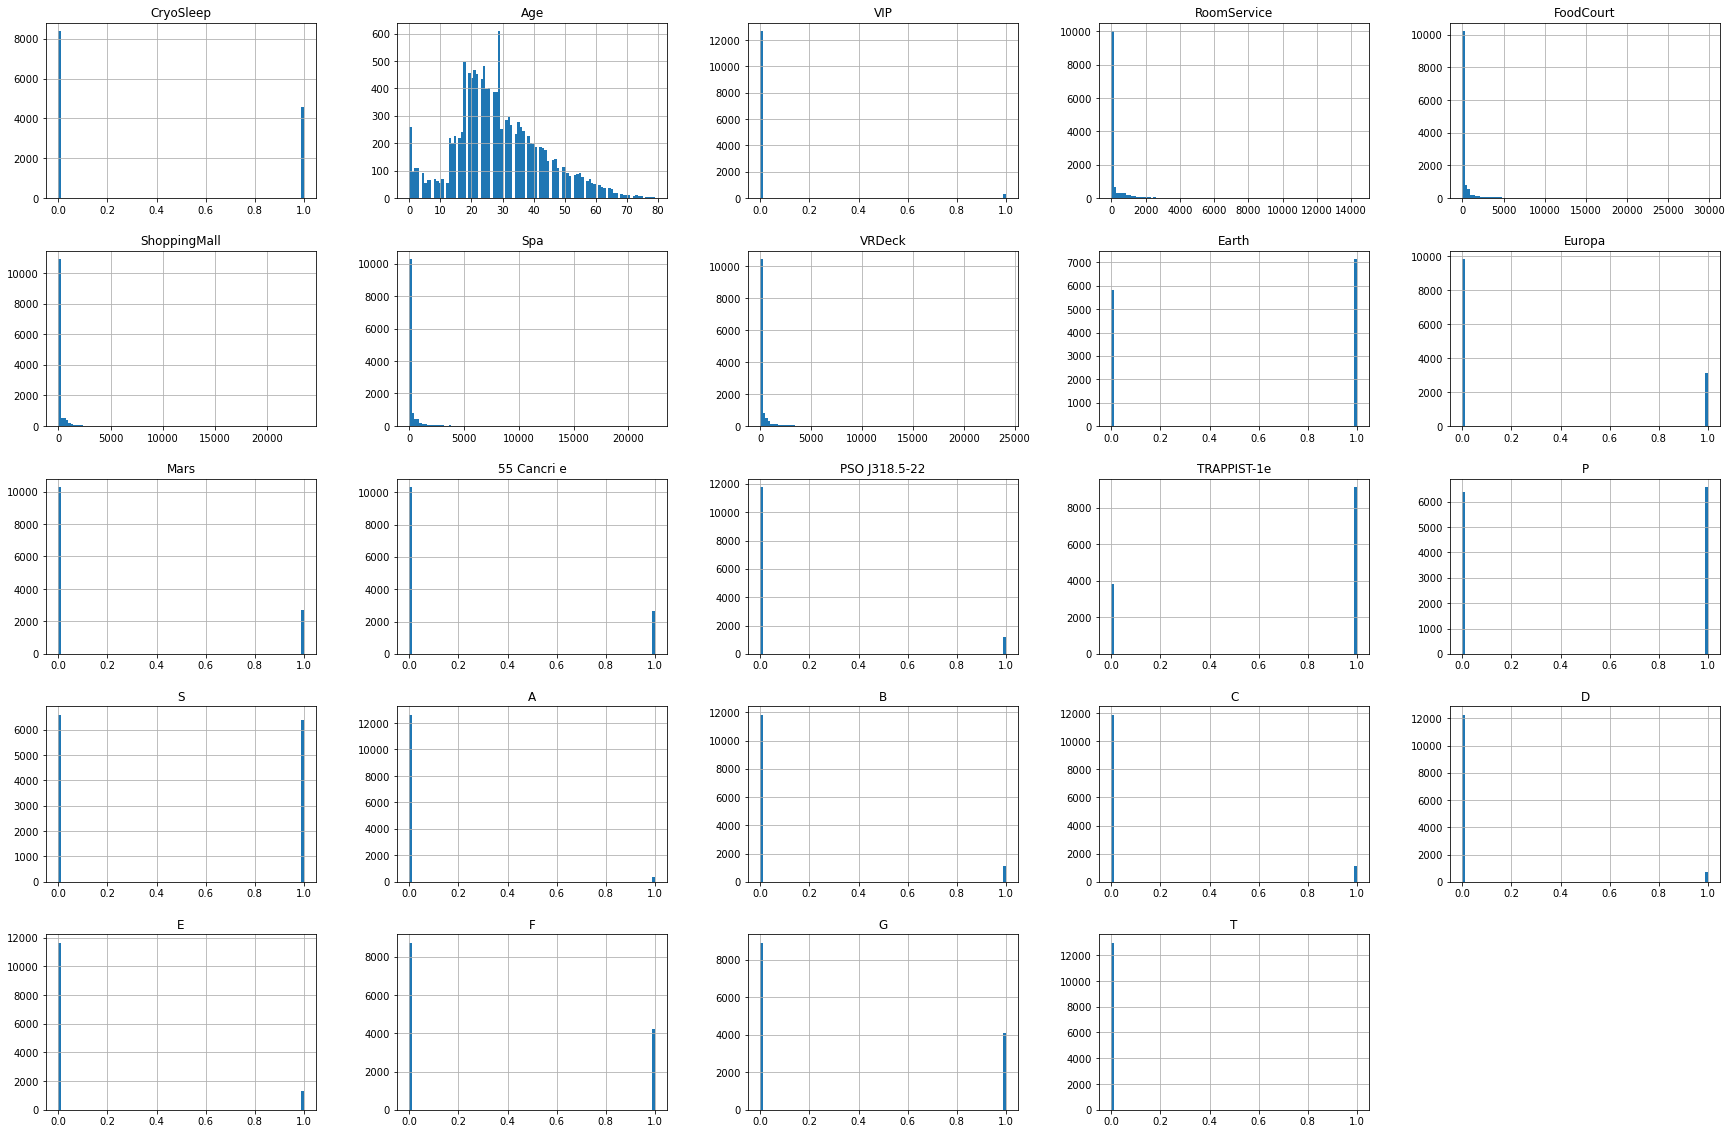

In [142]:
trainData.hist(bins=100,figsize=(30,20))
plt.show()

In [143]:
gBoost = GradientBoostingClassifier(n_estimators=100)
rForest= RandomForestClassifier(n_estimators=100)
lReg = LogisticRegression()

In [144]:
features = trainData.loc[:,trainData.columns!= "Transported"].to_numpy()
targets = trainData.loc[:,"Transported"].to_numpy()

split_ratio = 0.8
xTrain = features[:int(features.shape[0]*split_ratio)]
yTrain = targets[:int(targets.shape[0]*split_ratio)]

xTest = features[int(features.shape[0]*split_ratio):]
yTest = targets[int(targets.shape[0]*split_ratio):]

In [145]:
xTrain.shape,yTrain.shape,xTest.shape,yTest.shape

((10376, 25), (10376,), (2594, 25), (2594,))

In [146]:
gBoost.fit(xTrain,yTrain)
rForest.fit(xTrain,yTrain)
lReg.fit(xTrain,yTrain)

/Users/yahya/miniforge3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [147]:
print(gBoost.score(xTest,yTest))
print(rForest.score(xTest,yTest))
print(lReg.score(xTest,yTest))

0.5670778720123362
0.505011565150347
0.5343099460292984
